# 📈 Task 7: Support Vector Machines (SVM)

**Objective:** Use SVMs for linear and non-linear classification.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#### 📂 Load & Prepare Data

In [2]:
# Load the dataset
df = pd.read_csv("Breast_Cancer.csv")

# Drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Split features and target
X = df.drop("diagnosis", axis=1)
y = df['diagnosis']

#### ✂️ Split & Scale

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  # For cross-validation and PCA

#### 🤖 Train SVM Models

In [4]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

#### 🧪 Evaluate Models

In [5]:
# Evaluate linear kernel
print("SVM (Linear Kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# Evaluate RBF kernel
print("\nSVM (RBF Kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

SVM (Linear Kernel)
Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  2]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM (RBF Kernel)
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### 🔁 Cross-Validation Scores

In [6]:
# 5-fold cross-validation
cv_linear = cross_val_score(svm_linear, X_scaled, y, cv=5).mean()
cv_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5).mean()

print("Linear SVM CV Score:", round(cv_linear, 4))
print("RBF SVM CV Score:", round(cv_rbf, 4))

Linear SVM CV Score: 0.9701
RBF SVM CV Score: 0.9736


#### 🎨 Visualize via PCA

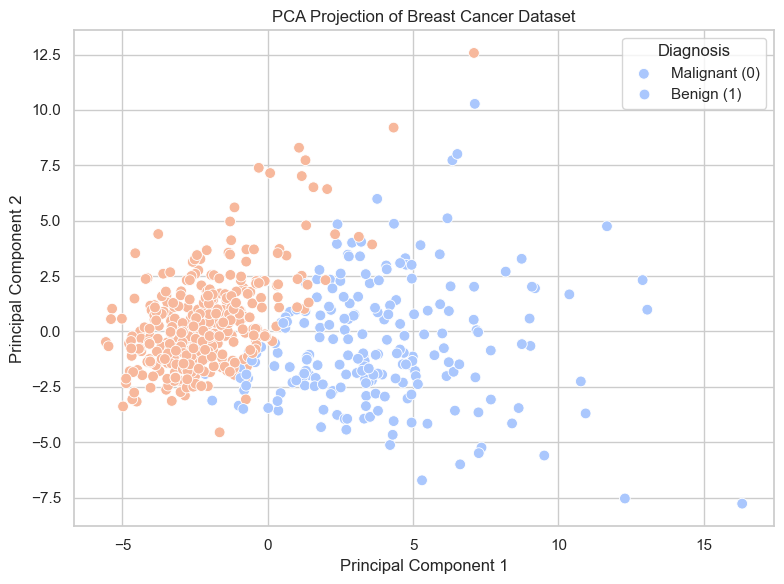

In [7]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Diagnosis"] = y.values

# Plot the PCA components
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Diagnosis", palette="coolwarm", s=60)
plt.title("PCA Projection of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Diagnosis", labels=["Malignant (0)", "Benign (1)"])
plt.tight_layout()
plt.show()